<a href="https://colab.research.google.com/github/cardavid11/tensorflow_certification/blob/main/100%20problems/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 3 will focus on Image Classification using Convolutional Neural Networks (CNNs) with TensorFlow.

### Problem 3: Image Classification with CNNs

#### Task Description:
Create a Convolutional Neural Network using TensorFlow to perform image classification on the CIFAR-10 dataset.

1. **Load Data**: Load the CIFAR-10 dataset.
2. **Preprocess Data**: Preprocess the images for CNN training (normalization, resizing if necessary).
3. **Build the CNN**:
   - Create a CNN model with multiple convolutional and pooling layers.
   - Use appropriate activation functions.
4. **Compile the Model**:
   - Choose an optimizer and loss function suitable for classification.
   - Include accuracy as a metric.
5. **Data Augmentation (Optional)**: Implement data augmentation to improve model robustness.
6. **Train the Model**: Train the model on the training data.
7. **Evaluate the Model**: Assess the model's performance on the test set.

#### Skills Tested:
- Understanding of CNN architecture for image processing.
- Familiarity with TensorFlow's Keras API for CNNs.
- Preprocessing and data augmentation techniques.
- Model training and evaluation.

#### Tips:
- Pay attention to the input shape required for CNNs.
- Experiment with different numbers of layers and filter sizes to improve performance.

Let's get started with this CNN-based image classification problem!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Data: Load the CIFAR-10 dataset.
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# Preprocess Data: Preprocess the images for CNN training (normalization, resizing if necessary).
# Normalize the data: rescale pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# Build the CNN:
# Create a CNN model with multiple convolutional and pooling layers.
# Use appropriate activation functions.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [ ]:
# Compile the Model:
# Choose an optimizer and loss function suitable for classification.
# Include accuracy as a metric.
model.compile(optimizer="RMSProp", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the Model: Train the model on the training data.
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.4575 - accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0685 - accuracy: 0.6276
Epoch 3/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9084 - accuracy: 0.6853
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7920 - accuracy: 0.7254
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7003 - accuracy: 0.7590
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.6249 - accuracy: 0.7863
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5595 - accuracy: 0.8065
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5023 - accuracy: 0.8266
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.4496 - accuracy: 0.8448
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [ ]:
# Evaluate the Model: Assess the model's performance on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0302 - accuracy: 0.6986


[1.030211091041565, 0.6985999941825867]

# Data Augmentation (Optional): Implement data augmentation to improve model robustness.

# Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.  

Augmented vs. Synthetic data
Augmented data is driven from original data with some minor changes. In the case of image augmentation, we make geometric and color space transformations (flipping, resizing, cropping, brightness, contrast) to increase the size and diversity of the training set.

Synthetic data is generated artificially without using the original dataset. It often uses DNNs (Deep Neural Networks) and GANs (Generative Adversarial Networks) to generate synthetic data.

Note: the augmentation techniques are not limited to images. You can augment audio, video, text, and other types of data too.

When Should You Use Data Augmentation?  
To prevent models from overfitting.
The initial training set is too small.
To improve the model accuracy.
To Reduce the operational cost of labeling and cleaning the raw dataset.
Limitations of Data Augmentation
The biases in the original dataset persist in the augmented data.
Quality assurance for data augmentation is expensive.
Research and development are required to build a system with advanced applications. For example, generating high-resolution images using GANs can be challenging.
Finding an effective data augmentation approach can be challenging.

Image Augmentation

Geometric transformations: randomly flip, crop, rotate, stretch, and zoom images. You need to be careful about applying multiple transformations on the same images, as this can reduce model performance.
Color space transformations: randomly change RGB color channels, contrast, and brightness.
Kernel filters: randomly change the sharpness or blurring of the image.
Random erasing: delete some part of the initial image.
Mixing images: blending and mixing multiple images.

Advanced Techniques
Generative adversarial networks (GANs): used to generate new data points or images. It does not require existing data to generate synthetic data.
Neural Style Transfer: a series of convolutional layers trained to deconstruct images and separate context and style.

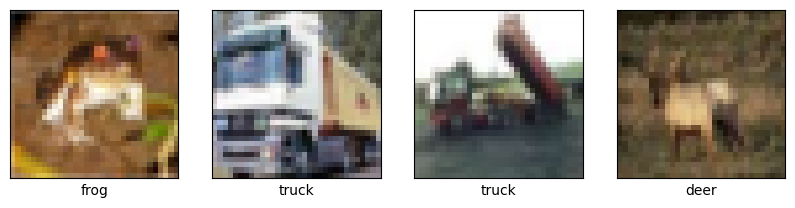

In [ ]:
# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display images and labels
def display_images(images, labels, num_images=4):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

# Display 4 images from x_train and their labels
display_images(x_train, y_train)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    # rotation_range=15,      # Random rotation between 0 and 15 degrees
    # width_shift_range=0.1,  # Random horizontal shifts up to 10% of the width
    # height_shift_range=0.1, # Random vertical shifts up to 10% of the height
    horizontal_flip=True,   # Random horizontal flips
    # You can add more transformations as needed
)

# Fit the ImageDataGenerator to your training data
datagen.fit(x_train)

In [21]:
model_with_data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model_with_data_augmentation.compile(optimizer="RMSProp", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    min_delta=0.001,      # Minimum change to qualify as an improvement
    patience=10,          # Stop if no improvement after 10 epochs
    mode='min',           # Stop training when the quantity monitored has stopped decreasing
    verbose=1,            # Print messages when the callback takes an action
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
)

ds = datagen.flow(x_train, y_train, batch_size=32)

# Train the model on the augmented training data
model_with_data_augmentation.fit(
          ds,
          steps_per_epoch=len(x_train) / 32,  # Number of steps per epoch
          # If len(x_train) is 50,000 (the size of the CIFAR-10 training dataset) and your batch size is 32, then steps_per_epoch will be 50000 / 32 ≈ 1562.5.
          # This means it takes 1563 steps (iterations) to process all training samples in one epoch. Each step processes 32 images.
          epochs=20,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping]
          )

1562/1562 [==============================] - 82s 52ms/step - loss: 0.6624 - accuracy: 0.1010 - val_loss: 0.8267 - val_accuracy: 0.1048
Epoch 9/50
 427/1562 [=======>......................] - ETA: 1:01 - loss: 0.6452 - accuracy: 0.1005

KeyboardInterrupt: ignored

Observing that a model with data augmentation initially performs worse than one without augmentation is not uncommon, especially in the early epochs of training. Here are some reasons why this might happen and what it means for your model:

### 1. Increased Complexity
- **Data Variation**: Data augmentation introduces additional variability and complexity into the training process. The model now has to learn from a more diverse set of data, which can include transformed versions of the original images.
- **Learning Curve**: This increased complexity can make the initial learning process slower. The model is adapting to a broader range of input data, which can initially reflect as lower performance metrics.

### 2. Longer Convergence Time
- **Adjustment Period**: Due to the variety of augmented data, the model might take more time to start converging towards optimal performance. It's learning more generalized features, which is beneficial in the long run but can appear as lower performance in the short term.
- **Epochs Needed**: More epochs might be needed for the model to fully leverage the benefits of data augmentation.

### 3. Preventing Overfitting
- **Robustness**: While the initial accuracy might be lower, data augmentation typically helps in building a more robust model that generalizes better to new, unseen data.
- **Overfitting Reduction**: The model with augmentation might end up with better performance on the validation or test data in the later stages of training, as it's less likely to overfit to the training data.

### 4. Tuning Augmentation Parameters
- **Balance**: It's crucial to find the right balance in the data augmentation parameters. Overly aggressive augmentation can make the learning task too difficult, while too little might not provide enough variability.
- **Experimentation**: You might need to experiment with different types and degrees of augmentation to find what works best for your specific dataset and model.

### Conclusion
- **Patience and Monitoring**: It's important to be patient and monitor the full course of training. Look at both training and validation performance metrics over time.
- **Final Evaluation**: The true test of the model's effectiveness will be its performance on the validation or test set, particularly after it has had enough epochs to learn from the augmented data.
- **Adjustment**: If the performance doesn't improve or if the augmentation seems too disruptive, consider adjusting the augmentation parameters.

In summary, a temporary drop in performance when using data augmentation can be a normal part of the training process, and the key benefits of augmentation often manifest over a longer period.

In [ ]:
model_with_data_augmentation.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.4952 - accuracy: 0.0746


[1.4951903820037842, 0.07460000365972519]

is neccesary that I use steps_per_epoch in the fit method?

The `steps_per_epoch` parameter in the `fit` method of a TensorFlow model is not always necessary, but its use depends on the specific circumstances of your training setup. Let's explore when and why you might use it:

### 1. When Using `ImageDataGenerator` or `tf.data.Dataset`
- If you are using an `ImageDataGenerator` or `tf.data.Dataset` for feeding data to your model, it may not always be clear how many samples are in one epoch, especially when applying data augmentation, which can effectively create an 'infinite' dataset.
- In such cases, `steps_per_epoch` explicitly specifies how many batches of data (steps) the model should take before considering one epoch completed.

### 2. When Not Using Data Generators
- If you are not using a data generator and instead passing the entire dataset as a NumPy array directly to the `fit` method, you don't necessarily need to set `steps_per_epoch`.
- TensorFlow automatically calculates the number of steps per epoch based on the batch size and the size of your training dataset.

### 3. When It's Useful
- **Control Over Training**: `steps_per_epoch` gives you control over how much of your training data is used in each epoch. This can be useful for debugging or when you want to see more frequent updates on training progress.
- **Large Datasets**: For very large datasets, where you might not want to use the entire dataset each epoch, you can set `steps_per_epoch` to a smaller number to use only a portion of the dataset per epoch, speeding up training iterations.

### 4. Default Behavior
- By default, if `steps_per_epoch` is not set, it is calculated as `total number of samples / batch size`. This ensures that the model sees the entire dataset in each epoch.

### Conclusion
- **Use Case Dependent**: Whether you need to set `steps_per_epoch` depends on how you are providing data to your model and whether you need explicit control over the number of steps in each epoch.
- **Default Suffices Often**: For many cases, especially with smaller datasets, the default behavior (not setting `steps_per_epoch`) is sufficient.

In summary, consider your training setup and specific needs to determine if setting `steps_per_epoch` is necessary for your model training.

I feel that the model that implement data augmentation is doing worst ( at least at the beginning, I am still waiting for the rests of epochs). What do you think?

Observing that a model with data augmentation initially performs worse than one without augmentation is not uncommon, especially in the early epochs of training. Here are some reasons why this might happen and what it means for your model:

### 1. Increased Complexity
- **Data Variation**: Data augmentation introduces additional variability and complexity into the training process. The model now has to learn from a more diverse set of data, which can include transformed versions of the original images.
- **Learning Curve**: This increased complexity can make the initial learning process slower. The model is adapting to a broader range of input data, which can initially reflect as lower performance metrics.

### 2. Longer Convergence Time
- **Adjustment Period**: Due to the variety of augmented data, the model might take more time to start converging towards optimal performance. It's learning more generalized features, which is beneficial in the long run but can appear as lower performance in the short term.
- **Epochs Needed**: More epochs might be needed for the model to fully leverage the benefits of data augmentation.

### 3. Preventing Overfitting
- **Robustness**: While the initial accuracy might be lower, data augmentation typically helps in building a more robust model that generalizes better to new, unseen data.
- **Overfitting Reduction**: The model with augmentation might end up with better performance on the validation or test data in the later stages of training, as it's less likely to overfit to the training data.

### 4. Tuning Augmentation Parameters
- **Balance**: It's crucial to find the right balance in the data augmentation parameters. Overly aggressive augmentation can make the learning task too difficult, while too little might not provide enough variability.
- **Experimentation**: You might need to experiment with different types and degrees of augmentation to find what works best for your specific dataset and model.

### Conclusion
- **Patience and Monitoring**: It's important to be patient and monitor the full course of training. Look at both training and validation performance metrics over time.
- **Final Evaluation**: The true test of the model's effectiveness will be its performance on the validation or test set, particularly after it has had enough epochs to learn from the augmented data.
- **Adjustment**: If the performance doesn't improve or if the augmentation seems too disruptive, consider adjusting the augmentation parameters.

In summary, a temporary drop in performance when using data augmentation can be a normal part of the training process, and the key benefits of augmentation often manifest over a longer period.

Selecting the number of epochs for training a neural network model is an important decision that can affect your model's performance. An epoch is one complete pass through the entire training dataset. Here are some guidelines to help you decide on the number of epochs:

### Factors to Consider
1. **Size of Dataset**:
   - Larger datasets often require fewer epochs since more training examples are seen in each epoch.
   - Smaller datasets might need more epochs or techniques like data augmentation.

2. **Complexity of the Model**:
   - More complex models with many parameters might need more epochs to converge.
   - Simpler models might converge quickly.

3. **Overfitting and Underfitting**:
   - Too many epochs can lead to overfitting, especially if you don't have enough training data.
   - Too few epochs might leave your model underfitted, not learning enough from the data.

4. **Monitoring Tools**:
   - Use callbacks like EarlyStopping in TensorFlow to stop training when the validation loss stops decreasing, which can prevent overfitting.

### Starting Point
- A common approach is to start with a moderate number of epochs, such as 10 to 20, and then adjust based on the model's performance.
- Monitor the training and validation loss and accuracy. If the validation accuracy stops improving and the loss stops decreasing, it might be time to stop training.

### Example
- Start with 15 epochs and monitor the performance.
- If the validation accuracy continues to improve, consider increasing the number of epochs.
- If overfitting is observed (training accuracy increases but validation accuracy decreases or plateaus), consider using fewer epochs or implementing techniques to combat overfitting.

### Using Callbacks for Dynamic Adjustment
- Implement callbacks like `EarlyStopping` to automatically stop training when the validation loss stops improving for a specified number of epochs. This is a dynamic way to decide the number of epochs during training.

### Conclusion
There isn't a one-size-fits-all number of epochs; it depends on your specific model and data. Start with a reasonable estimate, use callbacks for dynamic adjustments, and fine-tune based on the performance metrics you observe.

why 32 here "steps_per_epoch=len(x_train) / 32"

The `32` in the `steps_per_epoch=len(x_train) / 32` statement is the batch size used during model training. Here's a breakdown of what this means:

- **Batch Size**: The batch size is the number of training examples used in one iteration of model training. In the code snippet, a batch size of 32 is used, which means the model processes 32 images at a time during training.

- **Steps per Epoch**: An epoch is one pass through the entire training dataset. `steps_per_epoch` defines how many batches of samples to use in one epoch.

- **Calculation**: By dividing the total number of training samples (`len(x_train)`) by the batch size (32), you get the number of steps (batches of data) needed to cover the entire training set in one epoch.

### In Detail:
- If `len(x_train)` is 50,000 (the size of the CIFAR-10 training dataset) and your batch size is 32, then `steps_per_epoch` will be `50000 / 32 ≈ 1562.5`.
- This means it takes 1563 steps (iterations) to process all training samples in one epoch. Each step processes 32 images.

This setup ensures that each sample in your training dataset is seen by the model once per epoch, which is important for effective learning. The choice of batch size can affect your model's performance and training speed, and it's often determined based on memory constraints and the specific requirements of your dataset and model.

Your implementation for the image classification problem using a CNN on the CIFAR-10 dataset looks solid. Here's a brief overview and some suggestions:

### Overview of Your Implementation

1. **Data Loading and Preprocessing**:
   - You've correctly loaded the CIFAR-10 dataset and normalized the pixel values of the images to be between 0 and 1.

2. **CNN Architecture**:
   - Your model architecture includes convolutional layers (`Conv2D`) with ReLU activation functions and max-pooling layers (`MaxPooling2D`).
   - After the convolutional and pooling layers, you've added a `Flatten` layer to convert the 2D features to a 1D vector, followed by dense layers for classification.
   - The output layer with 10 units and a softmax activation is appropriate for the 10-class classification task in CIFAR-10.

3. **Model Compilation**:
   - You are using the RMSProp optimizer and `sparse_categorical_crossentropy` loss function, which is suitable for multi-class classification with integer labels.
   - Including accuracy as a metric allows you to monitor the classification performance during training.

4. **Model Training**:
   - Training for 10 epochs is a reasonable starting point to evaluate how the model performs.

5. **Model Evaluation**:
   - You're evaluating the model on the test set, which is crucial to understand its performance on unseen data.

### Suggestions for Improvement

1. **Data Augmentation**:
   - Consider implementing data augmentation to improve model generalization. Data augmentation can be particularly helpful for datasets like CIFAR-10, which has diverse image content.

2. **Early Stopping and Monitoring**:
   - Use callbacks like EarlyStopping to prevent overfitting. This callback will stop the training when the validation accuracy stops improving.
   - Monitoring training and validation accuracy and loss during training will help you understand if the model is learning effectively.

3. **Experiment with Hyperparameters**:
   - Experiment with different hyperparameters like the number of filters, kernel sizes, learning rate of the optimizer, and the number of neurons in the dense layers to find the best combination for your model.
   - Adjust the number of epochs based on the performance. If the model has not converged in 10 epochs, you might need to increase this number.

4. **Validation Set**:
   - If not already done, consider using a separate validation set during training to monitor the model's performance. This helps in tuning the model without touching the test set.

5. **Advanced Techniques**:
   - Explore more advanced techniques like batch normalization and dropout for further optimization of your model.

Overall, you have a good foundational CNN model for the CIFAR-10 dataset. With some fine-tuning and experimentation, you can potentially improve its performance further.